# Convnet

**Note: THIS BOOK IS FOR THE PURPOSE OF SELF-LEARNING IN ORDER TO UNDERSTAND THE WORKFLOW OF BUILDING A CONVNET. The number of images used for the training and validation is pretty small and therefore the accuracy is also pretty bad, and easily results in the overfitting.**

In [9]:
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

## Creating Generator

In [105]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './data/cnn_test/train',
    target_size=(200,200),
    batch_size=5
)

validation_generator = test_datagen.flow_from_directory(
    './data/cnn_test/test',
    target_size=(200,200),
    batch_size=5
)

Found 45 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


## Generating Images

[[ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


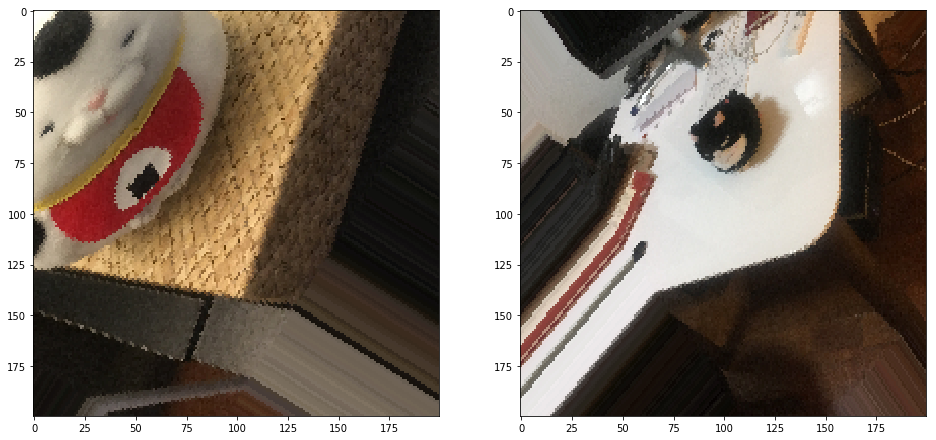

In [121]:
plt.subplots(figsize=(16,12))
for feature, label in train_generator:
    print(label)
    for i in range(0,2):
        plt.subplot(1,2,i+1)
        plt.imshow(feature[i])
    break

## Building Convnet

In [108]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 21, 21, 128)       147584    
__________

## Fitting

In [111]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=9,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=6
)

Epoch 1/100
9/9 [==============================] - 4s 494ms/step - loss: 0.9820 - acc: 0.5556 - val_loss: 1.0114 - val_acc: 0.4333
Epoch 2/100
9/9 [==============================] - 4s 472ms/step - loss: 0.9866 - acc: 0.5778 - val_loss: 1.1250 - val_acc: 0.4000
Epoch 3/100
9/9 [==============================] - 2s 209ms/step - loss: 0.9921 - acc: 0.5111 - val_loss: 1.1615 - val_acc: 0.3667
Epoch 4/100
9/9 [==============================] - 3s 351ms/step - loss: 1.0015 - acc: 0.5333 - val_loss: 1.0202 - val_acc: 0.4667
Epoch 5/100
9/9 [==============================] - 3s 333ms/step - loss: 0.8723 - acc: 0.6222 - val_loss: 1.0070 - val_acc: 0.4333
Epoch 6/100
9/9 [==============================] - 3s 348ms/step - loss: 1.0420 - acc: 0.5333 - val_loss: 1.0122 - val_acc: 0.4333
Epoch 7/100
9/9 [==============================] - 3s 345ms/step - loss: 0.9151 - acc: 0.6000 - val_loss: 1.0342 - val_acc: 0.5000
Epoch 8/100
9/9 [==============================] - 3s 349ms/step - loss: 0.8674 - a

9/9 [==============================] - 3s 344ms/step - loss: 0.6214 - acc: 0.7556 - val_loss: 1.3661 - val_acc: 0.5000
Epoch 64/100
9/9 [==============================] - 3s 324ms/step - loss: 0.6494 - acc: 0.7111 - val_loss: 1.2468 - val_acc: 0.5000
Epoch 65/100
9/9 [==============================] - 3s 348ms/step - loss: 0.6967 - acc: 0.7111 - val_loss: 1.3437 - val_acc: 0.4667
Epoch 66/100
9/9 [==============================] - 3s 339ms/step - loss: 0.6670 - acc: 0.6667 - val_loss: 1.3137 - val_acc: 0.4667
Epoch 67/100
9/9 [==============================] - 3s 331ms/step - loss: 0.5498 - acc: 0.7778 - val_loss: 1.1913 - val_acc: 0.4000
Epoch 68/100
9/9 [==============================] - 3s 335ms/step - loss: 0.6379 - acc: 0.7556 - val_loss: 1.4372 - val_acc: 0.4333
Epoch 69/100
9/9 [==============================] - 3s 345ms/step - loss: 0.6066 - acc: 0.6222 - val_loss: 1.7984 - val_acc: 0.4667
Epoch 70/100
9/9 [==============================] - 3s 338ms/step - loss: 0.6170 - acc: 0

## Visualization

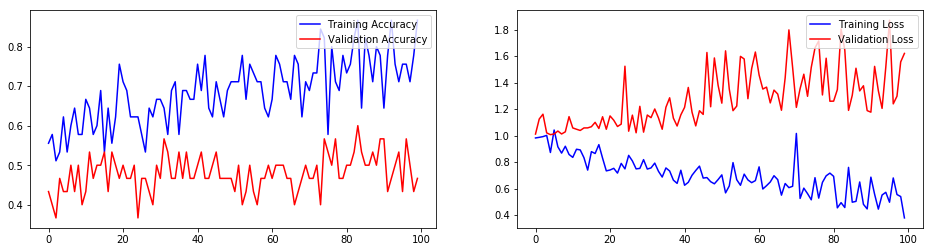

In [112]:
plt.subplots(figsize=(16,4))
plt.subplot(121)
plt.plot(history.history['acc'], 'b', label='Training Accuracy')
plt.plot(history.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')